In [5]:
!pip install librosa scikit-learn matplotlib pydub pandas

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------------- ------------------------- 3.9/11.1 MB 26.2 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 27.8 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   ------------

Found 837 valid files
Splitting data...
Training Logistic Regression...


C:\Users\timot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 13643 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Making predictions...
Accuracy: 0.7062146892655368
Predicted label: four


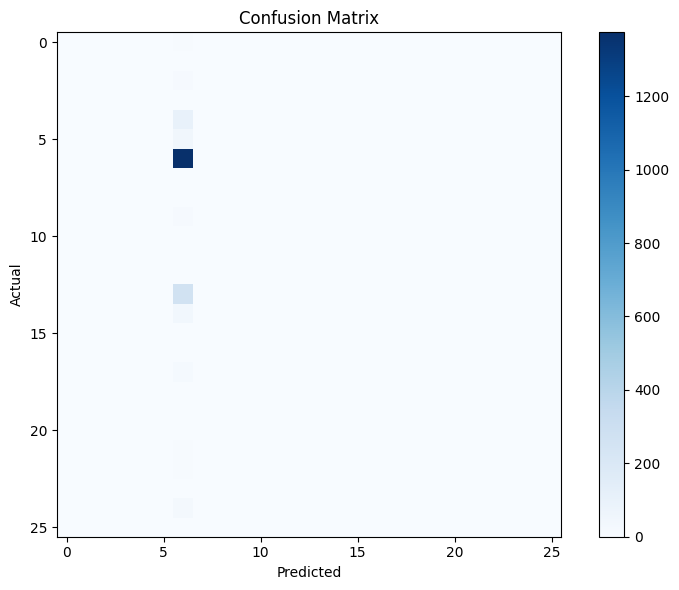

In [9]:
import os
import csv
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfcc.T, axis=0)

X = []
y = []

audio_dir = r"C:\Users\timot\Downloads\speech"
txt_path = r"C:\Users\timot\Downloads\speech\validation_list.txt"
valid_files = {}

with open(txt_path, "r+") as txt:
    lines = txt.readlines()
for line in lines:
        label, file = line.strip().split("/")
        valid_files[file] = label

print(f"Found {len(valid_files)} valid files")
processed_files = []
file_count = 0
for root, dirs, files in os.walk(audio_dir):
    for file in files:
        if file.endswith(".wav") and file in valid_files:
            wav_path = os.path.join(root, file)
            processed_files.append(wav_path) 
            features = extract_features(wav_path)
            X.append(features)
            y.append(valid_files[file])  

#Model Training
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
print("Training Logistic Regression...")
model = LogisticRegression(max_iter=300000, random_state=42)
model.fit(X_train, y_train)
print("Making predictions...")
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Test for model
test_file = r"C:\Users\timot\Downloads\Marvin.wav" 
if test_file:
    test_features = extract_features(test_file)
    print("Predicted label:", model.predict([test_features])[0])

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm[:33, :33], interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()